In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score

In [4]:
from app.data.data_analyses import DataAggregator

In [5]:
tickers = ['SBER', 'VTBR']
DA = DataAggregator(tickers)
df = DA.data['SBER']

In [6]:
df

ticker   close         value  i3  i3_retail         pv30  \
date                                                                  
2007-07-20   SBER  109.20   2211.623351 NaN        NaN  -250.841139   
2007-07-23   SBER  112.00   3901.828829 NaN        NaN  -226.422528   
2007-07-24   SBER  109.53   3536.964241 NaN        NaN  -394.936796   
2007-07-25   SBER  109.63   4300.852582 NaN        NaN  -758.553212   
2007-07-26   SBER  104.18   5299.122988 NaN        NaN  -634.700952   
...           ...     ...           ...  ..        ...          ...   
2020-04-20   SBER  189.32  11794.682206 NaN        NaN  -842.866756   
2020-04-21   SBER  186.05  17514.787768 NaN        NaN -1373.993225   
2020-04-22   SBER  190.20  14242.707866 NaN        NaN   147.225442   
2020-04-23   SBER  190.94  11973.068616 NaN        NaN   -54.224611   
2020-04-24   SBER  188.91  10472.460449 NaN        NaN  -861.300594   

                   pv70       pv100     yield  
date                                           
2007-07-20  -213.412084 -194.861282       NaN  
2007-07-23  -163.300345 -154.025808  2.564103  
2007-07-24  -347.726639 -308.472577 -2.205357  
2007-07-25  -494.205025 -382.474110  0.091299  
2007-07-26  -461.386081 -399.465073 -4.971267  
...                 ...         ...       ...  
2020-04-20  -968.008296 -873.819614 -1.293014  
2020-04-21 -1033.413352 -922.505215 -1.727234  
2020-04-22   181.597942  122.778026  2.230583  
2020-04-23   -95.076285  -79.299443  0.389064  
2020-04-24  -716.509240 -651.415763 -1.063161  

[3187 rows x 9 columns]

In [7]:
data = df['yield'].dropna()

In [8]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(data)
a = np.vstack([jb_test])
itog = SimpleTable(a, row)

print(itog)

        JB        p-value        skew             kurtosis     
---------------------------------------------------------------
54869.81254817057     0.0 0.8347055709307077 23.261909774408004
---------------------------------------------------------------


In [9]:
test = sm.tsa.adfuller(data)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -9.33591270516729
p-value:  9.064315985940293e-16
Critical values:  {'1%': -3.4324223949823685, '5%': -2.8624556569780975, '10%': -2.5672574254233744}
единичных корней нет, ряд стационарен


In [10]:
m = data.index[len(data.index)/2+1]
r1 = sm.stats.DescrStatsW(data[m:])
r2 = sm.stats.DescrStatsW(data[:m])
print('p-value: ', sm.stats.CompareMeans(r1,r2).ttest_ind()[1])

p-value:  0.9115400822583366


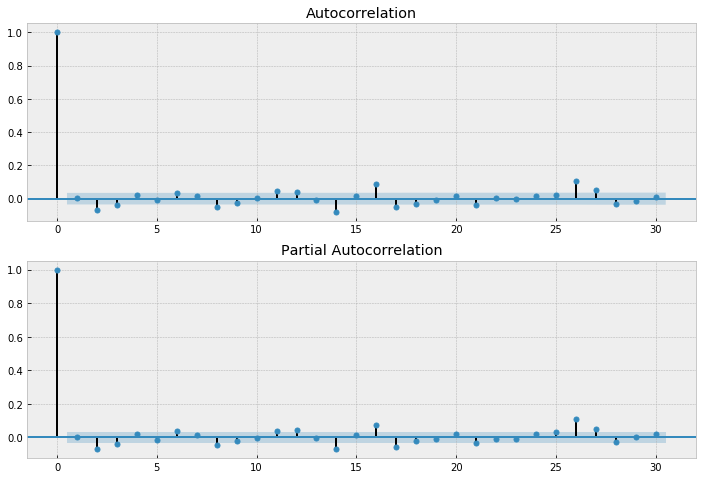

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=30, ax=ax2)

In [ ]:
src_data_model = data
model = sm.tsa.ARIMA(src_data_model, order=(17,0,17)).fit(full_output=False, disp=0)

/Users/andrejalekseev/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
print(model.summary())

In [ ]:
from datetime import date
d1 = date(2019, 2, 19)
d2 = date(2020, 2, 17)

pred = model.predict(2900, 3150)
trn = data[d1:d2]
r2 = r2_score(trn,pred)
print ('R^2: %1.2f' % r2)

In [ ]:
d = date(2019, 1, 1)

data[d:].plot(figsize=(15,6))
pr = pred[d:]
pr.plot(style='r--')

In [ ]:
res = pred.to_frame()
res['1'] = df['yield']
res.corr()